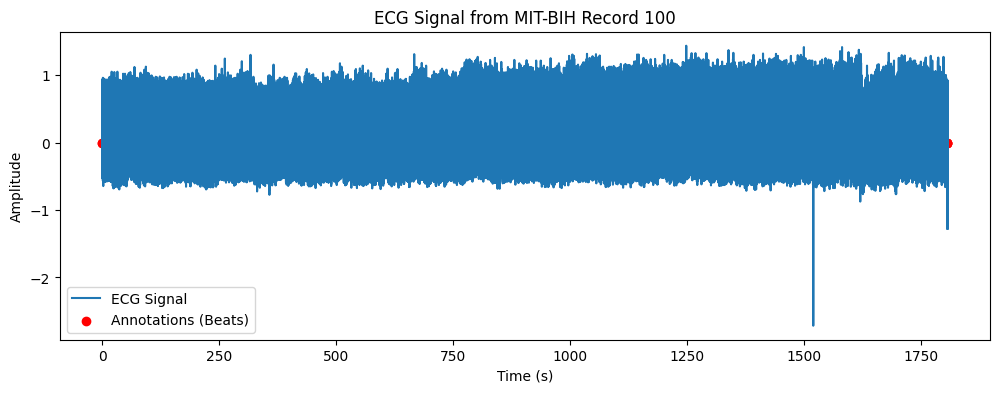

In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the MITDB dataset
dataset_path = "mitdb/100"  # Example: Record 100 from MITDB

# Load ECG Signal and Annotations
record = wfdb.rdrecord(dataset_path)
annotation = wfdb.rdann(dataset_path, 'atr')

# Extract signal and metadata
signal = record.p_signal[:, 0]  # Using channel 0 (lead)
fs = record.fs  # Sampling frequency

# Plot ECG signal
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(signal)) / fs, signal, label="ECG Signal")
plt.scatter(annotation.sample / fs, np.ones_like(annotation.sample) * 0, color='red', label="Annotations (Beats)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ECG Signal from MIT-BIH Record 100")
plt.legend()
plt.show()


In [2]:
import numpy as np
import wfdb
import torch
from torch.utils.data import Dataset, DataLoader
from scipy.signal import resample

# Constants
SAMPLING_RATE = 360  # Original sampling rate
TARGET_RATE = 250     # Downsampled rate
WINDOW_SIZE = 5 * TARGET_RATE  # 5 seconds window
PREDICTION_GAP = 2 * TARGET_RATE  # Predict anomaly 2 sec before
OVERLAP = 0.5  # 50% overlapping windows

# Function to load ECG signal & annotations
def load_ecg(record_name, path="mitdb"):
    # Load ECG signal
    record = wfdb.rdrecord(f"{path}/{record_name}")
    signal = record.p_signal[:, 0]  # Select lead-0

    # Load annotations
    annotation = wfdb.rdann(f"{path}/{record_name}", 'atr')
    abnormal_events = annotation.sample  # Abnormal event indices
    
    return signal, abnormal_events

# Normalize ECG signals (Z-score)
def normalize_signal(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# Convert ECG to overlapping windows
def create_windows(signal, events):
    windows = []
    labels = []

    step_size = int(WINDOW_SIZE * (1 - OVERLAP))  # Overlapping step
    num_samples = len(signal)

    for i in range(0, num_samples - WINDOW_SIZE, step_size):
        window = signal[i: i + WINDOW_SIZE]
        windows.append(window)

        # Label = 1 if an event occurs within PREDICTION_GAP
        future_events = [e for e in events if i < e < i + WINDOW_SIZE + PREDICTION_GAP]
        labels.append(1 if future_events else 0)

    return np.array(windows), np.array(labels)

# Custom PyTorch Dataset
class ECGDataset(Dataset):
    def __init__(self, signals, labels):
        self.signals = torch.tensor(signals, dtype=torch.float32).unsqueeze(1)  # (batch, 1, T)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.signals)

    def __getitem__(self, idx):
        return self.signals[idx], self.labels[idx]

# Load & preprocess dataset
record_name = "100"  # Change for different patients
signal, events = load_ecg(record_name)
signal = normalize_signal(signal)
windows, labels = create_windows(signal, events)

# Create DataLoader
dataset = ECGDataset(windows, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check shape
print("Dataset size:", len(dataset))
print("Sample shape:", dataset[0][0].shape, "Label:", dataset[0][1])


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [3]:
import sys
print(sys.executable)  # Python version

c:\Users\hp\AppData\Local\Programs\Python\Python311\python.exe


In [4]:
import torch
print(torch.__version__)  # PyTorch version

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\torch\lib\shm.dll" or one of its dependencies.